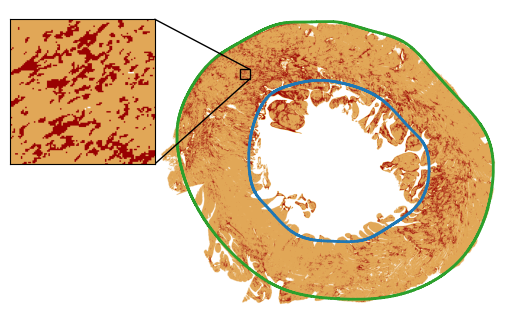

In [20]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors, patches
import matplotlib as mpl
from skimage import morphology, segmentation
from scipy import spatial

from fibrosisanalysis.parsers import (
    ImageLoader,
    DensityLoader,
    EdgeLoader
)
from fibrosisanalysis.segmentation import (
    SplineEdge
)


cmap = colors.LinearSegmentedColormap.from_list(
    'fibrosis', [(0, 'white'),
                 (0.5, '#e2a858'),
                 (1, '#990102')])

# path = Path(__file__).parents[1].joinpath('data')
path = Path('/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data')

heart = 'E11444_LMNA'
slice_name = 'E11444_08_SC2'

# heart = 'E10927_MYBPC3'
# slice_name = 'E10927_12_SC2'

image_loader = ImageLoader(path)
image_ds = image_loader.load_slice_data(path.joinpath(heart, 'DS',
                                                      slice_name))
image_or = image_loader.load_slice_data(path.joinpath(heart, 'Images',
                                                      slice_name))
image_gen = image_loader.load_slice_data(path.joinpath(heart, 'Generated',
                                                       slice_name))

density_map = DensityLoader(path).load_slice_data(path.joinpath(heart,
                                                                'Density',
                                                                slice_name))
image_ds[image_or == 0] = 0
edge_loader = EdgeLoader(path)

edges = {}

for i, name in enumerate(['epi', 'endo']):
    filename = '{}_{}'.format(slice_name, i)
    nodes = edge_loader.load_slice_data(path.joinpath(heart, 'Edges',
                                                      filename))

    spline_edge = SplineEdge()
    spline_edge.nodes = nodes[:, [1, 0]]
    full_nodes = spline_edge.sample_nodes(100_000)
    spline_edge.full_nodes = spline_edge.clip_boundaries(full_nodes,
                                                         image_or.shape)
    edges[name] = spline_edge

n_r_segments = 6
n_a_segments = 36


# x0 = [[1400, 1128], [1227, 898]]
# y0 = [[2313, 2858], [2192, 2729]]

# plt.figure()
# plt.imshow(image[2400:2500, 970:1070], origin='lower', cmap=cmap)
# plt.show()

edge_colors = ['#1f77b4', '#2ca02c']


def draw_lines(fig, ax0, ax1, x0, y0, x1, y1):
    fig.canvas.draw()
    transFigure = fig.transFigure.inverted()

    x0, y0 = transFigure.transform(ax0.transData.transform([x0, y0]))
    x1, y1 = transFigure.transform(ax1.transData.transform([x1, y1]))

    line = mpl.lines.Line2D((x0, x1), (y0, y1),
                            transform=fig.transFigure, lw=0.5, color='black')

    fig.lines.append(line)


fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.imshow(image_or, cmap=cmap, origin='lower', aspect='equal')
ax.plot(edges['endo'].full_nodes[:, 1],
        edges['endo'].full_nodes[:, 0],
        color=edge_colors[0], lw=2)
ax.plot(edges['epi'].full_nodes[:, 1], edges['epi'].full_nodes[:, 0],
        edge_colors[1], lw=2)

ax.axis('off')

y0, dy0 = 2400, 100
x0, dx0 = 970, 100
x1, x2, y1, y2 = x0, x0 + 100, y0, y0 + 100
axins = ax.inset_axes(
    [-0.4, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.imshow(image_or, origin="lower", cmap=cmap)
axins.set_xticks([])
axins.set_yticks([])
ax.indicate_inset_zoom(axins, edgecolor="black", lw=1, alpha=1)
plt.show()

In [29]:

path_save = Path('/Users/arstanbek/Projects/FibrosisAnalysis/paperfigures/figures')
fig.savefig(path_save.joinpath('histological_slice.png'), dpi=300,
            bbox_inches='tight')

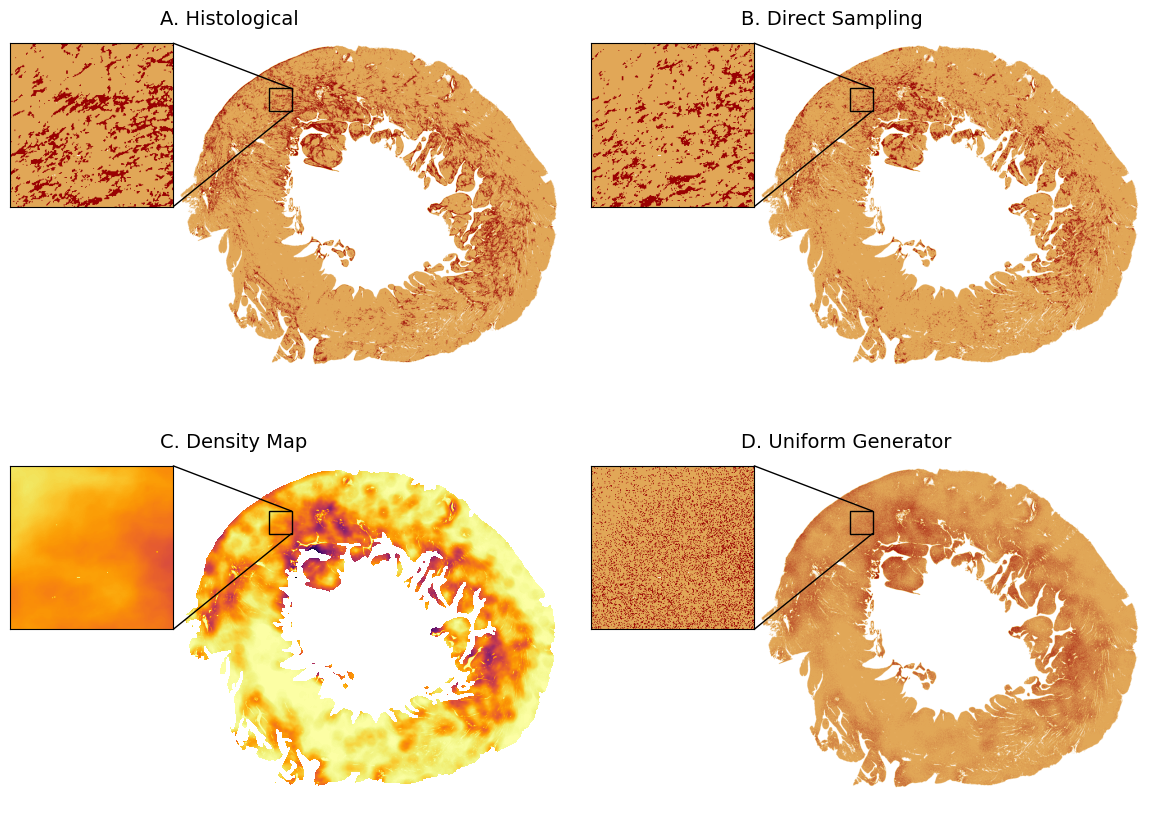

In [11]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from skimage import morphology

from fibrosisanalysis.parsers import (
    ImageLoader,
    DensityLoader,
)


cmap = colors.LinearSegmentedColormap.from_list(
    'fibrosis', [(0, 'white'),
                 (0.5, '#e2a858'),
                 (1, '#990102')])

# path = Path(__file__).parents[1].joinpath('data')
path = Path('/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data')

heart = 'E11444_LMNA'
slice_name = 'E11444_08_SC2'

image_loader = ImageLoader(path)
image_ds = image_loader.load_slice_data(path.joinpath(heart, 'DS',
                                                      slice_name))
image_or = image_loader.load_slice_data(path.joinpath(heart, 'Images',
                                                      slice_name))
image_gen = image_loader.load_slice_data(path.joinpath(heart, 'Generated',
                                                       slice_name))

density_map = DensityLoader(path).load_slice_data(path.joinpath(heart,
                                                                'Density',
                                                                slice_name))
image_ds[image_or == 0] = 0


def plot_image(ax, image, cmap, title='', loc=[-0.4, 0.5, 0.47, 0.47]):
    y0 = 2400
    dy0 = 200
    x0 = 970
    dx0 = 200
    ax.imshow(image, cmap=cmap, origin='lower', aspect='equal')
    ax.axis('off')

    x1, x2, y1, y2 = x0, x0 + dx0, y0, y0 + dy0
    axins = ax.inset_axes(loc,
                          xlim=(x1, x2),
                          ylim=(y1, y2),
                          xticklabels=[],
                          yticklabels=[])
    axins.imshow(image, origin="lower", cmap=cmap)
    axins.set_xticks([])
    axins.set_yticks([])
    ax.set_title(title, fontsize=14, loc='left')

    ax.indicate_inset_zoom(axins, edgecolor="black", lw=1, alpha=1)


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 9),
                        sharex=True, sharey=True)
plot_image(axs[0, 0], image_or, cmap, 'A. Histological')
plot_image(axs[0, 1], image_ds, cmap, 'B. Direct Sampling')
mask = morphology.remove_small_objects(image_or == 0, min_size=10_000)
density_map = np.ma.masked_where(mask, density_map)
plot_image(axs[1, 0], density_map, 'inferno_r', 'C. Density Map')
plot_image(axs[1, 1], image_gen, cmap, 'D. Uniform Generator')
plt.subplots_adjust(left=0.15, right=0.98, top=0.95, bottom=0.02,
                    wspace=0.4, hspace=0.02)
plt.show()


In [6]:
path_save = Path('/Users/arstanbek/Projects/FibrosisAnalysis/paperfigures/figures')
fig.savefig(path_save.joinpath('generators.png'), dpi=300,
            bbox_inches='tight')